In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

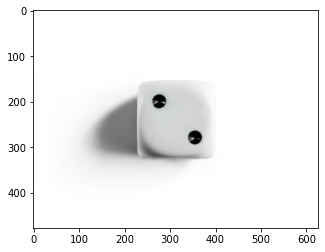

In [2]:
# Đọc hình ảnh từ file 
img = cv2.imread('img/anh0.jpg')

# Chuyển đổi không gian màu từ BGR sang RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Hiển thị hình ảnh trong không gian màu RGB
plt.imshow(rgb_img)

plt.show()

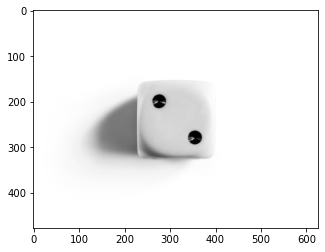

In [3]:
# Chuyển đổi hình ảnh màu sang ảnh xám
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Hiển thị hình ảnh xám 
plt.imshow(gray_img, cmap='gray')

[[[355.85     278.85      15.67    ]
  [275.55002  198.55      15.889999]]]


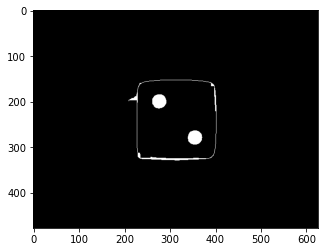

In [4]:
# Phát hiện biên của hình ảnh xám bằng phương pháp Canny
detected_edges = cv2.Canny(gray_img, 9, 150, 3)

# Tạo một kernel hình chữ nhật với kích thước 9x9 để sử dụng trong các phép toán hình học
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

# Thực hiện phép toán đóng (morphological closing) trên biên đã phát hiện để loại bỏ các lỗ hổng trong hình
close = cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=2)

# Áp dụng phương pháp Hough để phát hiện các vòng tròn trong hình đã được xử lý
circles = cv2.HoughCircles(close, cv2.HOUGH_GRADIENT, 1.1, 20, param1=50, param2=30, minRadius=5, maxRadius=55)

# In ra tọa độ và bán kính của các vòng tròn được phát hiện
print(circles)

# Hiển thị hình ảnh đã được xử lý sau khi thực hiện phép toán đóng
plt.imshow(close, cmap='gray')

2


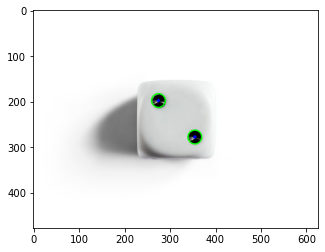

In [5]:
# Duyệt qua từng vòng tròn được phát hiện
if circles is not None:
    for i in circles[0]:  # Truy cập mảng đầu tiên của circles
        # Vẽ vòng tròn bên ngoài
        cv2.circle(rgb_img, (int(i[0]), int(i[1])), int(i[2]), (0, 255, 0), 2)
        
        # Vẽ tâm của vòng tròn
        cv2.circle(rgb_img, (int(i[0]), int(i[1])), 2, (0, 0, 255), 3)

# In ra số lượng vòng tròn đã phát hiện
if circles is not None:
    print(len(circles[0]))  # Số lượng vòng tròn
else:
    print(0)  # Không có vòng tròn nào được phát hiện

# Hiển thị hình ảnh đã vẽ các vòng tròn và tâm của chúng
plt.imshow(rgb_img)
plt.show()

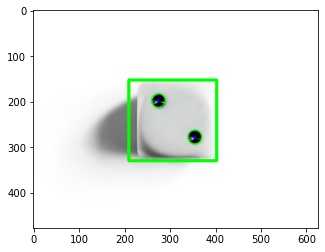

In [6]:
# Tìm các đường viền (contours) trong hình ảnh đã xử lý 'close'
contours, hierarchy = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Lấy hình chữ nhật bao quanh đường viền đầu tiên
x0, y0, w0, h0 = cv2.boundingRect(contours[0])

# Vẽ hình chữ nhật bao quanh đường viền đầu tiên trên hình ảnh rgb_img
cv2.rectangle(rgb_img, (x0, y0), (x0 + w0, y0 + h0), (0, 255, 0), 5)

# Hiển thị hình ảnh với hình chữ nhật đã vẽ
plt.imshow(rgb_img)

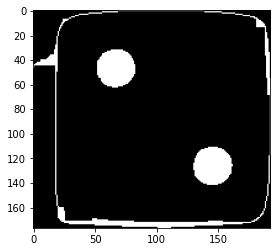

In [7]:
# Cắt một phần của hình ảnh 'close' theo hình chữ nhật đã xác định trước đó
dice0 = close[y0:y0 + h0, x0:x0 + w0]

# Hiển thị phần hình ảnh đã cắt, sử dụng bảng màu xám
plt.imshow(dice0, cmap='gray')
plt.show()

In [8]:
# Sử dụng phương pháp Hough để phát hiện các vòng tròn trong phần hình ảnh đã cắt 'dice0'
circles0 = cv2.HoughCircles(dice0, cv2.HOUGH_GRADIENT, 1.3, 20, param1=50, param2=30, minRadius=5, maxRadius=55)

# In ra số lượng vòng tròn đã phát hiện trong phần hình ảnh 'dice0'
print(len(circles0[0]))

2


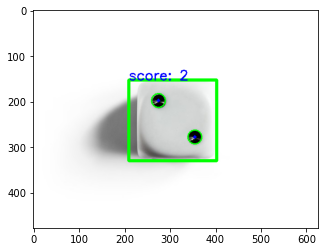

In [9]:
# Thêm văn bản hiển thị số điểm (số lượng vòng tròn đã phát hiện) vào hình ảnh 'rgb_img'
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Hiển thị hình ảnh với văn bản đã thêm
plt.imshow(rgb_img)
plt.show()

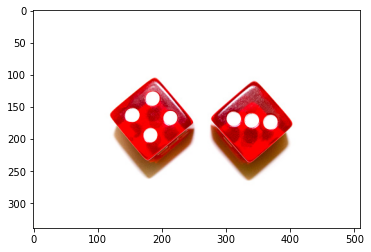

In [10]:
# Đọc hình ảnh từ file 
img = cv2.imread('img/anh1.jpg')

# Chuyển đổi không gian màu
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Hiển thị hình ảnh trong không gian màu
plt.imshow(rgb_img)

# Hiển thị cửa sổ hình ảnh
plt.show()

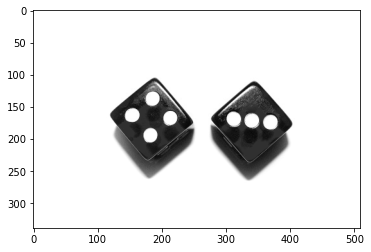

In [11]:
# Chuyển đổi hình ảnh từ không gian màu BGR sang ảnh xám
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Hiển thị hình ảnh xám sử dụng bảng màu xám
plt.imshow(gray_img, cmap='gray')

# Hiển thị cửa sổ hình ảnh
plt.show()

[[[311.40002  168.6       11.52    ]
  [153.       162.6       11.280001]
  [186.6      138.6       10.56    ]
  [213.00002  168.6       10.56    ]
  [339.       171.        10.8     ]
  [180.6      192.6       10.92    ]
  [369.       175.8       10.56    ]]]


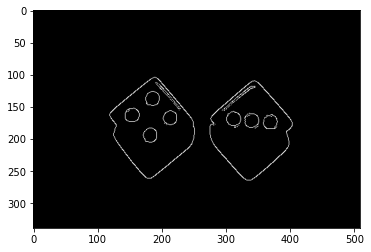

In [12]:
# Áp dụng ngưỡng nhị phân ngược để tạo hình ảnh nhị phân từ ảnh xám
thresh = cv2.threshold(gray_img, 220, 255, cv2.THRESH_BINARY_INV)[1]

# Phát hiện biên trong hình ảnh nhị phân 'thresh' bằng phương pháp Canny
detected_edges = cv2.Canny(thresh, 9, 150, 3)

# Sử dụng phương pháp Hough để phát hiện các vòng tròn trong hình ảnh 'detected_edges'
circles = cv2.HoughCircles(detected_edges, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=25, minRadius=3, maxRadius=35)

# In ra tọa độ và bán kính của các vòng tròn được phát hiện
print(circles)

# Hiển thị hình ảnh biên đã phát hiện
plt.imshow(detected_edges, cmap='gray')
plt.show()

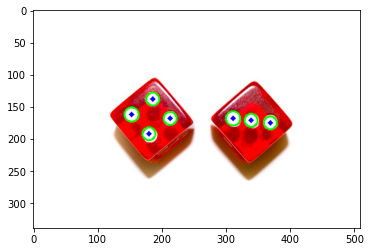

In [13]:
# Chọn các vòng tròn đã phát hiện (chỉ lấy phần đầu tiên của kết quả)
circles = circles[0, :]

# Lặp qua từng vòng tròn trong danh sách đã phát hiện
for i in circles:
    # Vẽ vòng tròn bên ngoài với tọa độ (x, y) và bán kính r
    cv2.circle(rgb_img, (int(i[0]), int(i[1])), int(i[2]), (0, 255, 0), 2)
    
    # Vẽ tâm của vòng tròn bằng cách sử dụng tọa độ (x, y) với kích thước điểm là 2
    cv2.circle(rgb_img, (int(i[0]), int(i[1])), 2, (0, 0, 255), 3)

# Hiển thị hình ảnh với các vòng tròn đã vẽ
plt.imshow(rgb_img)
plt.show()

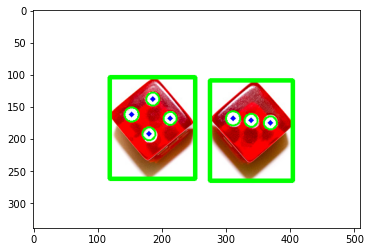

In [14]:
# Tìm các đường viền (contours) trong hình ảnh đã phát hiện biên 'detected_edges'
# cv2.RETR_EXTERNAL: chỉ lấy các đường viền bên ngoài
# cv2.CHAIN_APPROX_SIMPLE: sử dụng phương pháp nén để lưu trữ các đường viền
contours, hierarchy = cv2.findContours(detected_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vì chúng ta có 2 viên xúc xắc và muốn nhận diện điểm số của từng viên, cần chia hình ảnh thành hai phần riêng biệt
# Lấy hình chữ nhật bao quanh đường viền đầu tiên (contour[0])
x0, y0, w0, h0 = cv2.boundingRect(contours[0])
# Vẽ hình chữ nhật bao quanh viên xúc xắc đầu tiên trên hình ảnh 'rgb_img'
cv2.rectangle(rgb_img, (x0, y0), (x0 + w0, y0 + h0), (0, 255, 0), 5)

# Lấy hình chữ nhật bao quanh đường viền thứ hai (contour[1])
x1, y1, w1, h1 = cv2.boundingRect(contours[1])
# Vẽ hình chữ nhật bao quanh viên xúc xắc thứ hai trên hình ảnh 'rgb_img'
cv2.rectangle(rgb_img, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 5)

# Hiển thị hình ảnh với các hình chữ nhật bao quanh hai viên xúc xắc đã vẽ
plt.imshow(rgb_img)


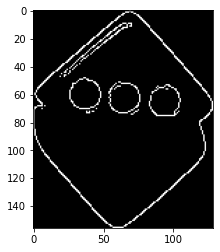

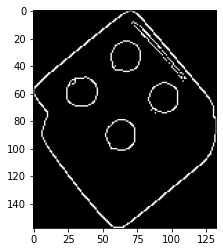

In [15]:
# Cắt hình ảnh 'detected_edges' để lấy phần hình ảnh của viên xúc xắc đầu tiên
dice0 = detected_edges[y0:y0 + h0, x0:x0 + w0]

# Hiển thị hình ảnh của viên xúc xắc đầu tiên
plt.imshow(dice0, cmap='gray')
plt.show()

# Cắt hình ảnh 'detected_edges' để lấy phần hình ảnh của viên xúc xắc thứ hai
dice1 = detected_edges[y1:y1 + h1, x1:x1 + w1]

# Hiển thị hình ảnh của viên xúc xắc thứ hai
plt.imshow(dice1, cmap='gray')
plt.show()

In [16]:
# Phát hiện các vòng tròn trong hình ảnh của viên xúc xắc đầu tiên (dice0) sử dụng phương pháp Hough
circles0 = cv2.HoughCircles(dice0, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=25, minRadius=3, maxRadius=35)

# Phát hiện các vòng tròn trong hình ảnh của viên xúc xắc thứ hai (dice1) sử dụng phương pháp Hough
circles1 = cv2.HoughCircles(dice1, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=25, minRadius=3, maxRadius=35)

# In ra số lượng vòng tròn đã phát hiện trong mỗi viên xúc xắc
print(len(circles0[0]), len(circles1[0]))

3 4


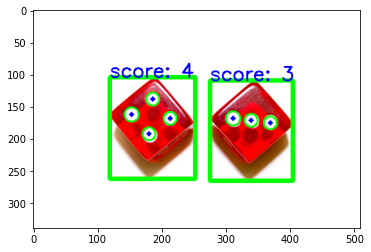

In [18]:
# Ghi điểm số của viên xúc xắc đầu tiên lên hình ảnh 'rgb_img'
# 'f'string dùng để định dạng chuỗi và chèn số lượng vòng tròn phát hiện được
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Ghi điểm số của viên xúc xắc thứ hai lên hình ảnh 'rgb_img'
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Hiển thị hình ảnh với điểm số đã được ghi lên
plt.imshow(rgb_img)
plt.show()

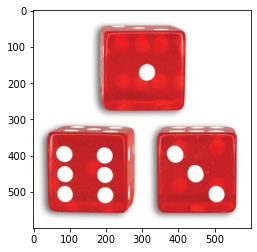

In [19]:
# Đọc hình ảnh 
img = cv2.imread('img/anh2.jpg')

# Chuyển đổi hình ảnh từ không gian màu BGR sang không gian màu RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Hiển thị hình ảnh đã chuyển đổi sang không gian màu 
plt.imshow(rgb_img)

plt.show()


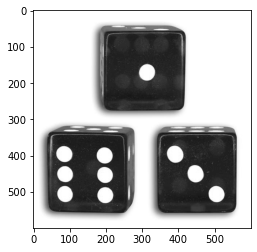

In [20]:
# Chuyển đổi hình ảnh từ không gian màu BGR sang hình ảnh xám (grayscale)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Hiển thị hình ảnh xám với bảng màu xám
plt.imshow(gray_img, cmap='gray')

# Hiển thị cửa sổ hình ảnh cho người dùng xem
plt.show()


10


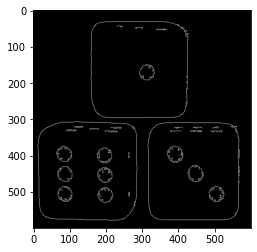

In [22]:
# Áp dụng ngưỡng nhị phân ngược để tạo hình ảnh nhị phân từ hình ảnh xám
thresh = cv2.threshold(gray_img, 250, 255, cv2.THRESH_BINARY_INV)[1]

# Phát hiện biên trong hình ảnh nhị phân 'thresh' bằng phương pháp Canny
detected_edges = cv2.Canny(thresh, 9, 150, 3)

# Sử dụng phương pháp Hough để phát hiện các vòng tròn trong hình ảnh 'detected_edges'
circles = cv2.HoughCircles(detected_edges, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=25, minRadius=3, maxRadius=35)

# In ra số lượng vòng tròn đã phát hiện
print(len(circles[0]))

# Hiển thị hình ảnh biên đã phát hiện
plt.imshow(detected_edges, cmap='gray')
plt.show()


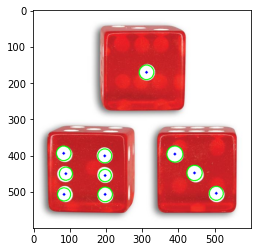

In [23]:
# Lấy thông tin về các vòng tròn từ kết quả phát hiện, chỉ lấy phần đầu tiên của mảng
circles = circles[0, :]

# Lặp qua từng vòng tròn đã phát hiện
for i in circles:
    # Vẽ vòng tròn ngoài cùng trên hình ảnh 'rgb_img'
    cv2.circle(rgb_img, (int(i[0]), int(i[1])), int(i[2]), (0, 255, 0), 2)
    
    # Vẽ tâm của vòng tròn trên hình ảnh 'rgb_img'
    cv2.circle(rgb_img, (int(i[0]), int(i[1])), 2, (0, 0, 255), 3)

# Hiển thị hình ảnh với các vòng tròn đã được vẽ lên
plt.imshow(rgb_img)
plt.show()

In [24]:
# Tạo một kernel hình chữ nhật có kích thước 3x3 để sử dụng trong các phép toán hình học
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Thực hiện phép giãn (dilation) trên hình ảnh biên đã phát hiện 'detected_edges' với kernel vừa tạo
dil = cv2.dilate(detected_edges, kernel, iterations=1)

# Tìm các đường viền (contours) trong hình ảnh đã được giãn 'dil'
contours, hierarchy = cv2.findContours(dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

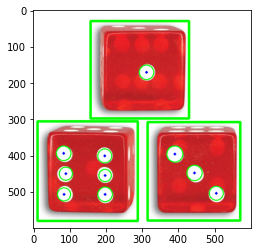

In [25]:
# Do có 3 xúc xắc và chúng ta muốn tính điểm của từng cái, cần tách chúng thành các hình ảnh riêng biệt và nhận diện điểm số của chúng.
# Tìm tọa độ và kích thước của đường bao (bounding box) cho xúc xắc đầu tiên
x0, y0, w0, h0 = cv2.boundingRect(contours[0])
# Vẽ hình chữ nhật bao quanh xúc xắc đầu tiên trên hình ảnh 'rgb_img'
cv2.rectangle(rgb_img, (x0, y0), (x0 + w0, y0 + h0), (0, 255, 0), 5)

# Tìm tọa độ và kích thước của đường bao cho xúc xắc thứ hai
x1, y1, w1, h1 = cv2.boundingRect(contours[1])
# Vẽ hình chữ nhật bao quanh xúc xắc thứ hai trên hình ảnh 'rgb_img'
cv2.rectangle(rgb_img, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 5)

# Tìm tọa độ và kích thước của đường bao cho xúc xắc thứ ba
x2, y2, w2, h2 = cv2.boundingRect(contours[2])
# Vẽ hình chữ nhật bao quanh xúc xắc thứ ba trên hình ảnh 'rgb_img'
cv2.rectangle(rgb_img, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 0), 5)

# Hiển thị hình ảnh 'rgb_img' với các hình chữ nhật đã vẽ xung quanh các xúc xắc
plt.imshow(rgb_img)

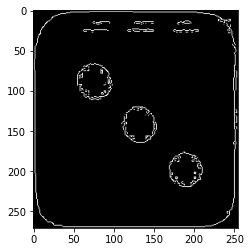

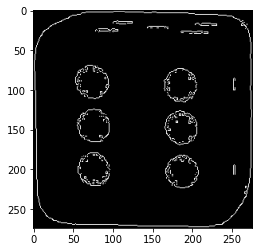

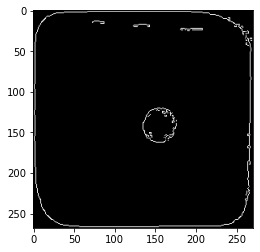

In [26]:
# Tách hình ảnh của xúc xắc đầu tiên từ hình ảnh biên 'detected_edges' dựa trên tọa độ và kích thước đã tính toán
dice0 = detected_edges[y0:y0 + h0, x0:x0 + w0]

# Tách hình ảnh của xúc xắc thứ hai từ hình ảnh biên 'detected_edges'
dice1 = detected_edges[y1:y1 + h1, x1:x1 + w1]

# Tách hình ảnh của xúc xắc thứ ba từ hình ảnh biên 'detected_edges'
dice2 = detected_edges[y2:y2 + h2, x2:x2 + w2]

# Hiển thị hình ảnh xúc xắc đầu tiên dưới dạng hình ảnh xám
plt.imshow(dice0, cmap='gray')
plt.show()

# Hiển thị hình ảnh xúc xắc thứ hai dưới dạng hình ảnh xám
plt.imshow(dice1, cmap='gray')
plt.show()

# Hiển thị hình ảnh xúc xắc thứ ba dưới dạng hình ảnh xám
plt.imshow(dice2, cmap='gray')
plt.show()

In [27]:
# Phát hiện các vòng tròn trong hình ảnh xúc xắc đầu tiên 'dice0' bằng phương pháp Hough
circles0 = cv2.HoughCircles(dice0, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=25, minRadius=3, maxRadius=35)

# Phát hiện các vòng tròn trong hình ảnh xúc xắc thứ hai 'dice1'
circles1 = cv2.HoughCircles(dice1, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=25, minRadius=3, maxRadius=35)

# Phát hiện các vòng tròn trong hình ảnh xúc xắc thứ ba 'dice2'
circles2 = cv2.HoughCircles(dice2, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=25, minRadius=3, maxRadius=35)

# In ra số lượng các vòng tròn được phát hiện trong mỗi hình ảnh xúc xắc
print(len(circles0[0]), len(circles1[0]), len(circles2[0]))

3 6 1


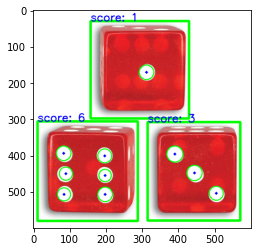

In [28]:
# Ghi điểm số của xúc xắc đầu tiên lên hình ảnh 'rgb_img'
# Sử dụng hàm cv2.putText để thêm văn bản vào hình ảnh
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Ghi điểm số của xúc xắc thứ hai lên hình ảnh 'rgb_img'
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Ghi điểm số của xúc xắc thứ ba lên hình ảnh 'rgb_img'
cv2.putText(rgb_img, f'score: {len(circles2[0])}', (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Hiển thị hình ảnh 'rgb_img' với điểm số đã được ghi
plt.imshow(rgb_img)
plt.show()


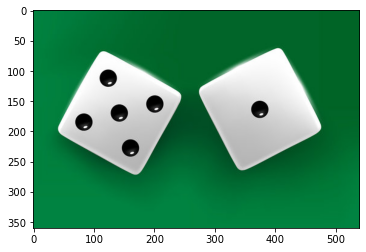

In [30]:
# Đọc hình ảnh từ tệp '3.jpg' và lưu vào biến 'img'
img = cv2.imread('img/anh3.jpg')

# Chuyển đổi hình ảnh từ không gian màu BGR (OpenCV) sang không gian màu RGB (matplotlib)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Hiển thị hình ảnh đã chuyển đổi màu sắc bằng matplotlib
plt.imshow(rgb_img)
plt.show()

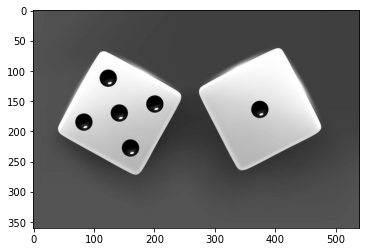

In [31]:
# Chuyển đổi hình ảnh từ không gian màu BGR sang hình ảnh xám (grayscale)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Hiển thị hình ảnh xám bằng matplotlib, sử dụng bản đồ màu xám
plt.imshow(gray_img, cmap='gray')

# Hiển thị cửa sổ đồ họa với hình ảnh xám
plt.show()

6


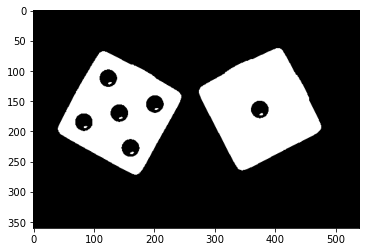

In [32]:
# Áp dụng ngưỡng nhị phân để tạo hình ảnh nhị phân từ hình ảnh xám 'gray_img'
thresh = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY)[1]

# Phát hiện biên trong hình ảnh nhị phân 'thresh' bằng phương pháp Canny
detected_edges = cv2.Canny(thresh, 9, 150, 3)

# Tạo một kernel hình chữ nhật với kích thước 3x3 để sử dụng trong các phép toán hình học
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Áp dụng phép toán hình học "MORPH_CLOSE" để làm đầy các khoảng trống trong hình ảnh nhị phân
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

# Sử dụng phương pháp Hough để phát hiện các vòng tròn trong hình ảnh 'close'
circles = cv2.HoughCircles(close, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=25, minRadius=3, maxRadius=35)

# In ra số lượng các vòng tròn được phát hiện
print(len(circles[0]))

# Hiển thị hình ảnh đã được xử lý với phép toán hình học
plt.imshow(close, cmap='gray')
plt.show()

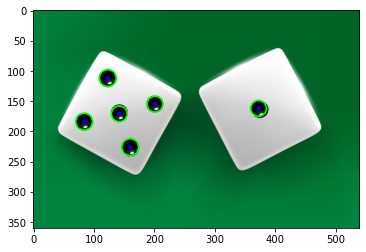

In [33]:
# Lấy mảng vòng tròn đã phát hiện, chỉ giữ lại các tọa độ và bán kính
circles = circles[0, :]

# Lặp qua từng vòng tròn trong danh sách 'circles'
for i in circles:
    # Vẽ vòng tròn bên ngoài trên hình ảnh 'rgb_img'
    cv2.circle(rgb_img, (int(i[0]), int(i[1])), int(i[2]), (0, 255, 0), 2)
    # Vẽ tâm của vòng tròn trên hình ảnh 'rgb_img'
    cv2.circle(rgb_img, (int(i[0]), int(i[1])), 2, (0, 0, 255), 3)

# Hiển thị hình ảnh 'rgb_img' với các vòng tròn đã được vẽ
plt.imshow(rgb_img)
plt.show()

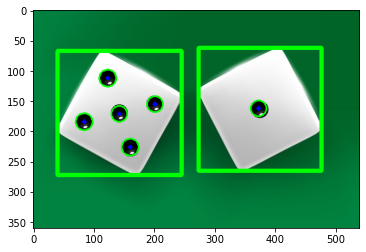

In [34]:
# Tìm các đường viền (contours) trong hình ảnh đã phát hiện biên 'detected_edges'
contours, hierarchy = cv2.findContours(detected_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vì chúng ta có 2 viên xúc xắc và muốn xác định điểm số của từng viên, 
# chúng ta cần tách chúng thành hai hình ảnh riêng biệt để nhận diện điểm số.

# Tính toán hình chữ nhật bao quanh viên xúc xắc đầu tiên
x0, y0, w0, h0 = cv2.boundingRect(contours[0])
# Vẽ hình chữ nhật bao quanh viên xúc xắc đầu tiên lên hình ảnh 'rgb_img'
cv2.rectangle(rgb_img, (x0, y0), (x0 + w0, y0 + h0), (0, 255, 0), 5)

# Tính toán hình chữ nhật bao quanh viên xúc xắc thứ hai
x1, y1, w1, h1 = cv2.boundingRect(contours[1])
# Vẽ hình chữ nhật bao quanh viên xúc xắc thứ hai lên hình ảnh 'rgb_img'
cv2.rectangle(rgb_img, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 5)

# Hiển thị hình ảnh 'rgb_img' với các hình chữ nhật bao quanh viên xúc xắc
plt.imshow(rgb_img)

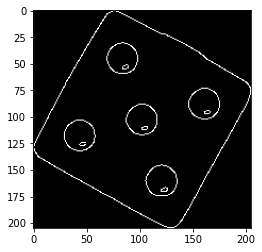

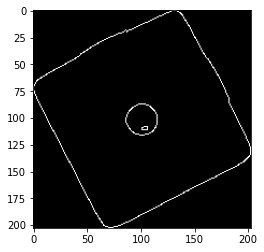

In [35]:
# Cắt phần hình ảnh chứa viên xúc xắc đầu tiên từ hình ảnh đã phát hiện biên 'detected_edges'
dice0 = detected_edges[y0:y0 + h0, x0:x0 + w0]

# Cắt phần hình ảnh chứa viên xúc xắc thứ hai từ hình ảnh đã phát hiện biên 'detected_edges'
dice1 = detected_edges[y1:y1 + h1, x1:x1 + w1]

# Hiển thị hình ảnh của viên xúc xắc đầu tiên (dice0) dưới dạng hình ảnh xám
plt.imshow(dice0, cmap='gray')
plt.show()

# Hiển thị hình ảnh của viên xúc xắc thứ hai (dice1) dưới dạng hình ảnh xám
plt.imshow(dice1, cmap='gray')
plt.show()


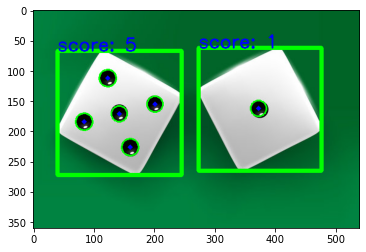

In [36]:
# Sử dụng phương pháp Hough để phát hiện các vòng tròn trong hình ảnh viên xúc xắc đầu tiên (dice0)
circles0 = cv2.HoughCircles(dice0, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=25, minRadius=3, maxRadius=35)

# Sử dụng phương pháp Hough để phát hiện các vòng tròn trong hình ảnh viên xúc xắc thứ hai (dice1)
circles1 = cv2.HoughCircles(dice1, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=25, minRadius=3, maxRadius=35)

# Ghi điểm số của viên xúc xắc đầu tiên lên hình ảnh rgb_img
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Ghi điểm số của viên xúc xắc thứ hai lên hình ảnh rgb_img
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Hiển thị hình ảnh rgb_img với các điểm số được ghi
plt.imshow(rgb_img)
plt.show()
